# Downloading the data

1. Create your account and put the credentials to .pyintdemsecrets
2. List your tiles, visually, or using Coverage module
    - Give a bbox
    - Apply shoreline filterint
3. Search the tiles using appropriate api
    - search()
    - select (head, tail)
    - download()

#### Format of .pyintdemsecrets
```
[THEIA]
USER = your_username
PASS = your_password

[COPERNICUS]
USER = your_username
PASS = your_password
```

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# uncomment the following if you had not installed the package
# import sys
# sys.path.append('/home/khan/Documents/developments/pyIntertidalDEM')

from pyintdem.coverage import Coverage
from pathlib import Path

In [5]:
# for example, inside legos network (deprecated)
proxies = {
    'http':'http://proxy.legos.obs-mip.fr:3128',
    'https':'http://proxy.legos.obs-mip.fr:3128'
}

# or otherwise
proxies = {} # proxies=proxies can be omitted

# From Copernicus

In [6]:
shapedir = Path('./Shapes')
if not shapedir.exists():
    shapedir.mkdir()

bbox = [41.5, 51.5, -26, -11]

copernicus_coverage = Coverage(bbox=bbox, shoreline=False, source='Copernicus', proxies=proxies)
copernicus_coverage.filter_by_shoreline()

copernicus_coverage.to_file(shapedir/'selection.geojson')
copernicus_coverage.to_file(shapedir/'selection.shp')

<GeoAxes: >

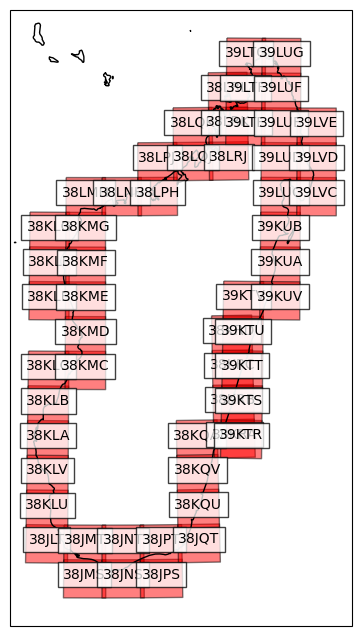

In [7]:
fig, ax = plt.subplots(figsize=(6, 8), subplot_kw={'projection':ccrs.PlateCarree()})
copernicus_coverage.plot(ax=ax)

In [9]:
tiles = copernicus_coverage.as_list(prefix='T')
len(tiles)

56

In [17]:
from pyintdem.copernicus import CopernicusAPI

copernicusapi = CopernicusAPI(proxies=proxies)
copernicusapi.search(tiles=tiles, startDate='2016-12-01', completionDate='2023-12-31', cloudCover=3)

In [18]:
copernicusapi.save('results_copernicus_2016_2023.geojson')

In [25]:
import json
with open('results_copernicus_2016_2023.geojson', 'r') as f:
    data = json.load(f)

<GeoAxes: >

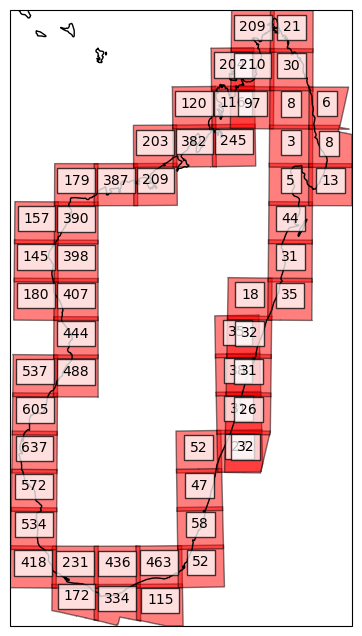

In [32]:
copernicusapi.plot()

In [ ]:
datadir = Path('/run/media/khan/Madagascar/Sentinel2/Data')
copernicusapi.tail(10).download(savedir=datadir) # Downloading the last 10 images

# From Theia

<GeoAxesSubplot:>

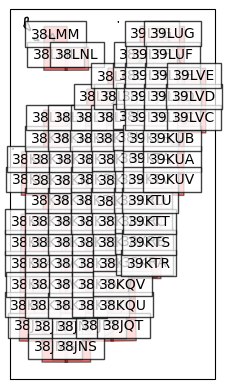

In [29]:
shapedir = Path('/run/media/khan/Madagascar/Sentinel2/Shapes')
datadir = Path('/run/media/khan/Madagascar/Sentinel2/Data')
if not shapedir.exists():
    shapedir.mkdir()

bbox = [41.5, 51.5, -26, -11]

theia_coverage = Coverage(bbox=bbox, shoreline=False, source='Theia', proxies=proxies)
theia_coverage.plot()

<GeoAxesSubplot:>

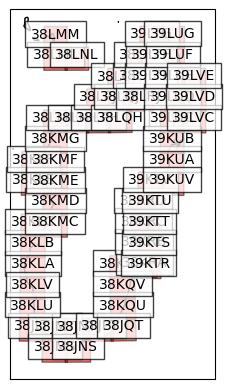

In [30]:
theia_coverage.filter_by_shoreline()
theia_coverage.plot()

In [31]:
tiles = theia_coverage.as_list(prefix='T')
len(tiles)

58

In [32]:
from pyintdem.theia import TheiaAPI

theiaapi = TheiaAPI(proxies=proxies)
theiaapi.search(tiles=tiles, startDate='2016-01-01', completionDate='2023-12-31', cloudCover=3)

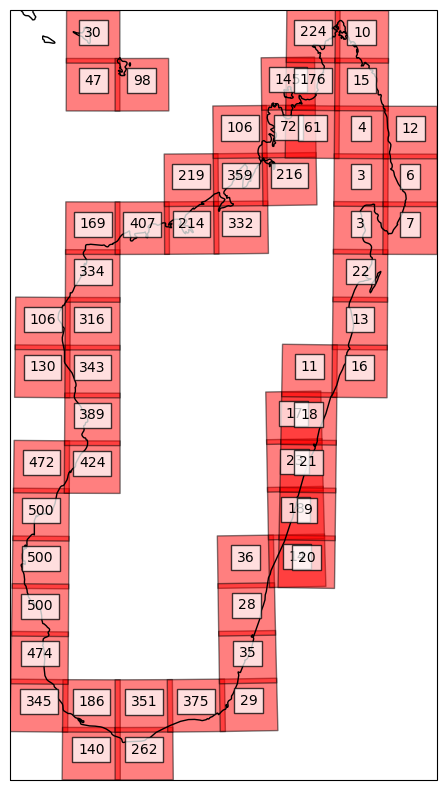

In [38]:
fig, ax = plt.subplots(figsize=(6, 10), subplot_kw={'projection':ccrs.PlateCarree()})
theiaapi.plot(ax=ax)
plt.savefig('Theia_data_availability_2016_2023.png', dpi=150, bbox_inches='tight')

In [ ]:
theiaapi.head(3).download(savedir=datadir) # Downloading first 3 files